# Week 4: Bivariate Distributions

Known as the “Live Music Capital of the World,” Austin, Texas is also home to the longest-running music series in American television history, Austin City Limits.  This dataset includes data on a sample of musicians that performed live on the PBS television series Austin City Limits over the last 10 years.  Data on each artist include measures of commercial popularity, such as the number of social media followers on Twitter or Facebook, and their success in winning a Grammy Music Award. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

acl = pd.read_csv("AustinCityLimits.csv")

In [2]:
acl.head()

,Unnamed: 0,Artist,Year,Month,Season,Gender,Age,Age.Group,Grammy,Genre,BB.wk.top10,Twitter,Twitter.100k,Facebook,Facebook.100k
0,1,Aimee Mann,2008,November,fall,F,52,Fifties or Older,Y,Singer-Songwriter,0.0,101870.0,1.0,113576,1
1,2,Alabama Shakes,2013,February,winter,F,24,Twenties,N,Rock/Folk/Indie,1.0,73313.0,0.0,298278,1
2,3,Allen Toussaint,2009,January,winter,M,75,Fifties or Older,N,Jazz/Blues,NaN,308634.0,1.0,10721,0
3,4,Andrew Bird,2009,October,fall,M,39,Thirties,N,Rock/Folk/Indie,1.0,56343.0,0.0,318313,1
4,5,Arcade Fire,2007,November,fall,F,33,Thirties,Y,Rock/Folk/Indie,1.0,404439.0,1.0,1711685,1


## Pre Lab

What genre was played by the first female artist in the dataset who was over 60 years of age? Match the case of the genre as it appears in the dataset.

In [3]:
female_acl = acl[(acl["Gender"] == "F") & (acl["Age"] > 60)]
female_acl["Genre"]

9     Jazz/Blues
16       Country
58       Country
Name: Genre, dtype: object

### Primary Question
For artists age 30 or older, do female artists play different kinds of music on Austin City Limits than male artists?

Create a subset of the data for artists age 30 or older.

In [4]:
older = acl[acl["Age"] >= 30]

Create a table to show the marginal distribution for each variable. 
Create a contingency table to show the conditional distribution for gender and genre.

In [5]:
older.groupby('Gender')['Genre'].value_counts()

Gender  Genre            
F       Rock/Folk/Indie       8
        Singer-Songwriter     7
        Country               6
        Jazz/Blues            4
M       Rock/Folk/Indie      53
        Country              11
        Jazz/Blues            7
        Singer-Songwriter     6
Name: Genre, dtype: int64

Make a bar chart to better visualize how many male and female artists played in each genre.

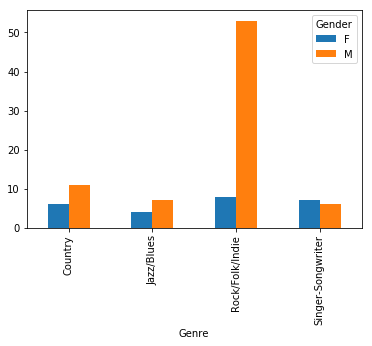

In [6]:
older.groupby('Gender')['Genre'].value_counts().unstack(0).plot.bar()
plt.show()

Calculate P(A):  the probability of each type of music (genre) being played.

In [7]:
older.groupby('Genre').size().div(len(older))

Genre
Country              0.166667
Jazz/Blues           0.107843
Rock/Folk/Indie      0.598039
Singer-Songwriter    0.127451
dtype: float64

Calculate P(A|B):  the probability of each genre, given the artist’s gender.

In [8]:
older.groupby('Gender')['Genre'].value_counts().div(len(older))

Gender  Genre            
F       Rock/Folk/Indie      0.078431
        Singer-Songwriter    0.068627
        Country              0.058824
        Jazz/Blues           0.039216
M       Rock/Folk/Indie      0.519608
        Country              0.107843
        Jazz/Blues           0.068627
        Singer-Songwriter    0.058824
Name: Genre, dtype: float64

Interpret what these probabilities tell us about the relationship between genre and gender. 

1. How many male artists are in the 30+ year old artist subset of the Austin City Limits dataset?
2. How many female artists are in the 30+ year old artist subset of the Austin City Limits dataset?

In [9]:
older['Gender'].value_counts()

M    77
F    25
Name: Gender, dtype: int64

To determine the proportion of jazz performers that were male, you would divide ________ by ________.

In [13]:
male_jazz = older['Artist'][(older['Genre'] == "Jazz/Blues") & (older['Gender'] == 'M')].count()
male_jazz = float(male_jazz)
jazz = older['Artist'][older['Genre'] == "Jazz/Blues"].count()
jazz = float(jazz)
print male_jazz, 'by', jazz
male_jazz / jazz

7.0 by 11.0


0.6363636363636364

To determine the proportion of males that performed jazz, you would divide ________ by ________. 

In [14]:
male = older['Artist'][older['Gender'] == 'M'].count()
male = float(male)
print male_jazz, 'by', male
male_jazz / male

7.0 by 77.0


0.09090909090909091

How many artists performed rock/folk/indie music?

In [15]:
rfi_artist = older['Artist'][older['Genre'] == "Rock/Folk/Indie"].count()
rfi_artist = float(rfi_artist)
rfi_artist

61.0

What is the probability that a randomly selected artist from the dataset performed rock/folk/indie music?

In [16]:
total_artist = older['Artist'].count()
total_artist = float(total_artist)
rfi_artist / total_artist

0.5980392156862745

What is the probability that a randomly selected female artist performed rock/folk/indie music?

In [17]:
female = older['Artist'][older['Gender'] == 'F'].count()
female = float(female)
female_rfi = older['Artist'][(older['Gender'] == 'F') & (older['Genre'] == 'Rock/Folk/Indie')].count()
female_rfi = float(female_rfi)
female_rfi / female

0.32

### Conclusions
The music played on Austin City Limits was grouped into four genres, including Country, Jazz, Rock and Singer-Songwriter. We wanted to examine only those artists who were age 30 or older.  Rock was the most frequently played genre, performed by 59.8 % of the Austin City Limits artists. Among female artists, however, only 32.0 % of the artists played Rock music. This difference between the marginal and conditional probabilities suggests that gender and genre are not independent. This difference was also evident in the bar plots, where it was evident that females were more likely to perform in the Singer-Songwriter category than their male counterparts.